In [1]:
%matplotlib inline
import xarray as xr
import dask
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy

# Geographic ploting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
sns.set(context="talk", font_scale=2)

In [ ]:
# to adapt accordingly:
exceed_folder = ""
last_skillful_day_folder = ""
figure_folder = ""

# Seasonal daily

In [3]:
perc=95
minimal_threshold=5
seas = "MJJASO"
BLF_lower_CI_summer = xr.open_mfdataset(last_skillful_day_folder+"BLF_seas_Last_lead_day_median_lower_5thperc_CI_95th_perc_"+str(seas)+".nc")
seas = "NDJFMA"
BLF_lower_CI_winter = xr.open_mfdataset(last_skillful_day_folder+"BLF_seas_Last_lead_day_median_lower_5thperc_CI_95th_perc_"+str(seas)+".nc")

percentile_data = xr.open_mfdataset(exceed_folder+"Observ_"+ str(perc)+"thperc_season_dependant.nc")

In [4]:
BLF_lower_CI_summer

<xarray.Dataset>
Dimensions:          (lon: 130, lat: 85)
Coordinates:
  * lon              (lon) float64 -15.0 -14.5 -14.0 -13.5 ... 48.5 49.0 49.5
  * lat              (lat) float64 30.0 30.5 31.0 31.5 ... 70.5 71.0 71.5 72.0
Data variables:
    Last_lead_outCI  (lat, lon) float32 dask.array<chunksize=(85, 130), meta=np.ndarray>

In [25]:
min_perc_winter=np.amin(percentile_data.perc95.isel(season=[0,3]), axis=0)
min_perc_summer=np.amin(percentile_data.perc95.isel(season=[1,2]), axis=0)

In [26]:
BLF_summer = BLF_lower_CI_summer.Last_lead_outCI.where(min_perc_summer>minimal_threshold)
BLF_winter = BLF_lower_CI_winter.Last_lead_outCI.where(min_perc_winter>minimal_threshold)

In [15]:
col_8 = sns.color_palette("cubehelix", n_colors=8)
#bounds = [i for i in np.linspace(0,14,2)]
levels22 = [0,2,4,6,8,10,12,14]
levels =  [0,2,4,6,8,10,12,14,16]

cbar_ticks = [  levels[i] + (levels[i+1]-levels[i]) / 2.0 for i in range(7)]
cbar_labels = [ "0-1","2-3","4-5","6-7","8-9","10-11","12-13"]

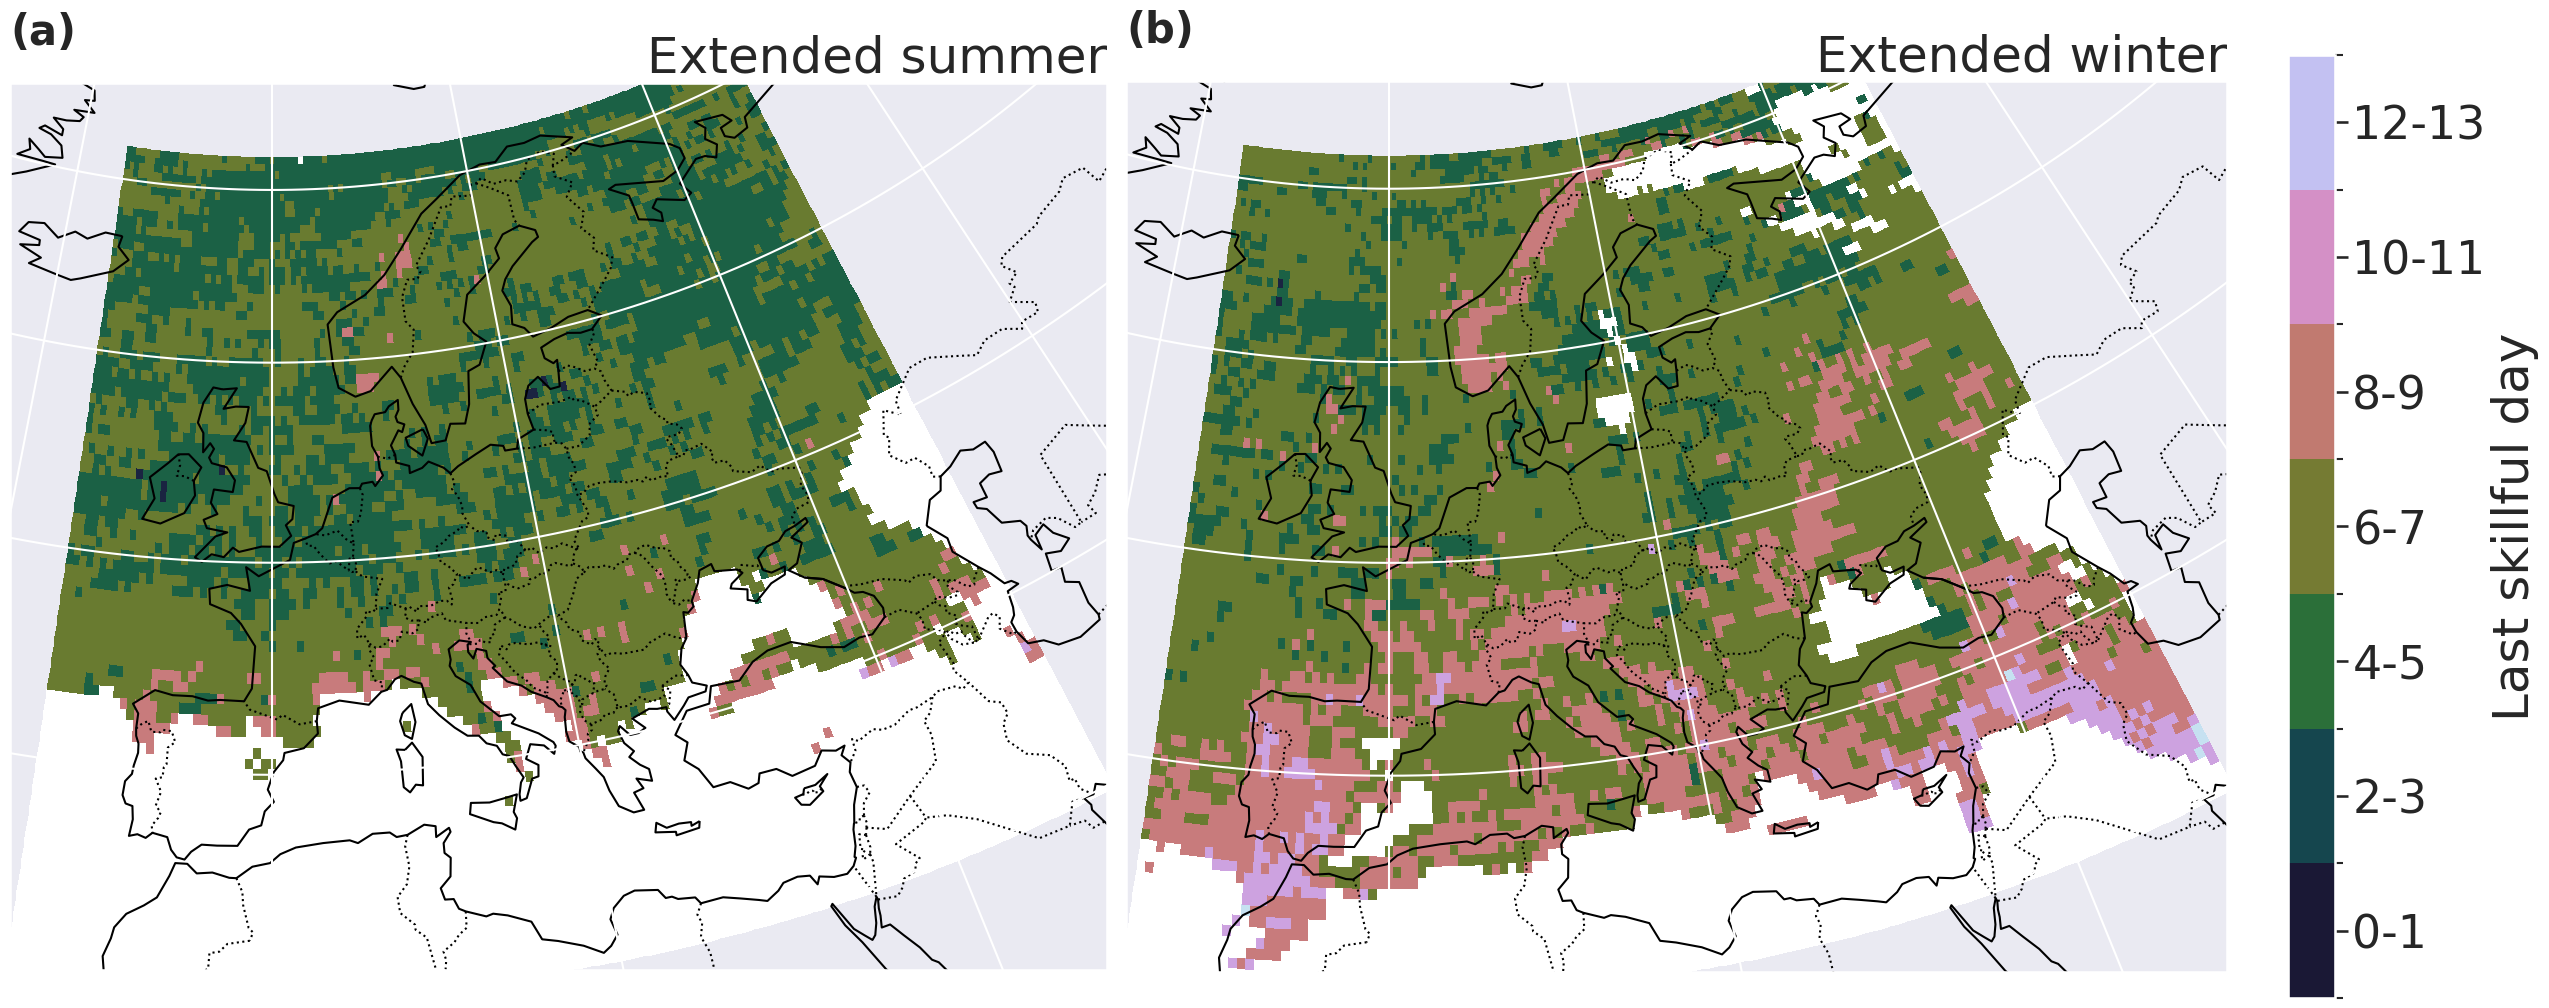

In [16]:
fig=plt.figure(figsize=(30,20))
gs = fig.add_gridspec(1, 21)

local_cmap = copy.copy(cm.cubehelix)
local_cmap.set_bad('white', alpha = 1)

ax1 = fig.add_subplot(gs[:, :10], projection=ccrs.AlbersEqualArea())
ax1.text(0, 1.08, "(a)", transform=ax1.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


a = BLF_summer.plot.pcolormesh(ax=ax1, levels=levels, cmap=local_cmap,add_colorbar=False,
                               transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, linestyle='-')
ax1.add_feature(cfeature.BORDERS, linestyle=':')

ax1.set_title('') ; ax1.set_title("Extended summer", loc='right');



ax2 = fig.add_subplot(gs[:, 10:], projection=ccrs.AlbersEqualArea())
ax2.text(0, 1.08, "(b)", transform=ax2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}

b = BLF_winter.plot.pcolormesh(ax=ax2, levels=levels22, colors = col_8,add_colorbar=False,
                               transform=ccrs.PlateCarree()) #for the colorbar
c = BLF_winter.plot.pcolormesh(ax=ax2, levels=levels, cmap=local_cmap,add_colorbar=False,
                               transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2.add_feature(cfeature.BORDERS, linestyle=':')

ax2.set_title(''); ax2.set_title("Extended winter", loc='right');

cbar = fig.colorbar(b, ax=ax2, fraction = 0.039, label=r'Last skillful day', ticks=cbar_ticks, )
cbar.ax.set_yticklabels(cbar_labels);

plt.savefig(figure_folder+"Panel_BLS_daily_seas.png", bbox_inches="tight",pad_inches=0)

# Spatialy aggregated

In [17]:
perc=95
minimal_threshold=5


percentile_data = xr.open_mfdataset(exceed_folder+"Observ_"+ str(perc)+"thperc_season_dependant.nc")
min_perc_winter=np.amin(percentile_data.perc95.isel(season=[0,3]), axis=0)
min_perc_summer=np.amin(percentile_data.perc95.isel(season=[1,2]), axis=0)


seas = "NDJFMA"

BLF_lower_CI = xr.open_mfdataset(last_skillful_day_folder+"BLF_spatiACC_seasonal_Last_lead_day_median_lower_5thperc_CI_"+str(perc)+"th_perc_"+str(seas)+".nc")
BLF_1ev_winter = BLF_lower_CI.Last_lead_lowerCI_1ev.where(min_perc_winter>minimal_threshold)
BLF_2ev_winter = BLF_lower_CI.Last_lead_lowerCI_2ev.where(min_perc_winter>minimal_threshold)
BLF_3ev_winter = BLF_lower_CI.Last_lead_lowerCI_3ev.where(min_perc_winter>minimal_threshold)



seas = "MJJASO"

BLF_lower_CI = xr.open_mfdataset(last_skillful_day_folder+"BLF_spatiACC_seasonal_Last_lead_day_median_lower_5thperc_CI_"+str(perc)+"th_perc_"+str(seas)+".nc")

BLF_1ev_summer = BLF_lower_CI.Last_lead_lowerCI_1ev.where(min_perc_summer>minimal_threshold)
BLF_2ev_summer = BLF_lower_CI.Last_lead_lowerCI_2ev.where(min_perc_summer>minimal_threshold)
BLF_3ev_summer = BLF_lower_CI.Last_lead_lowerCI_3ev.where(min_perc_summer>minimal_threshold)



In [18]:
col_8 = sns.color_palette("cubehelix", n_colors=8)
#bounds = [i for i in np.linspace(0,14,2)]
levels22 = [0,2,4,6,8,10,12,14]
levels =  [0,2,4,6,8,10,12,14,16]

cbar_ticks = [  levels[i] + (levels[i+1]-levels[i]) / 2.0 for i in range(7)]
cbar_labels = [ "0-1","2-3","4-5","6-7","8-9","10-11","12-13"]

In [23]:
fig=plt.figure(figsize=(30,20))
gs = fig.add_gridspec(10, 31)

local_cmap = copy.copy(cm.cubehelix)
local_cmap.set_bad('white', alpha = 1)

ax1 = fig.add_subplot(gs[:6, :10], projection=ccrs.AlbersEqualArea())
ax1.text(0, 1.08, "(a)", transform=ax1.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}



a = BLF_1ev_summer.plot.pcolormesh(ax=ax1, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, linestyle='-')
ax1.add_feature(cfeature.BORDERS, linestyle=':')

ax1.set_title('') ; ax1.set_title("1 event", loc='right');
ax1.set_title("Extended summer         ", loc='center')



ax2 = fig.add_subplot(gs[:6, 10:20], projection=ccrs.AlbersEqualArea())
ax2.text(0, 1.08, "(b)", transform=ax2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


b = BLF_2ev_summer.plot.pcolormesh(ax=ax2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2.add_feature(cfeature.BORDERS, linestyle=':')

ax2.set_title(''); ax2.set_title("2 events", loc='right');




ax3 = fig.add_subplot(gs[:6, 20:], projection=ccrs.AlbersEqualArea())
ax3.text(0, 1.08, "(c)", transform=ax3.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax3.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


c = BLF_3ev_summer.plot.pcolormesh(ax=ax3, levels=levels22, colors=col_8,
                            add_colorbar=False, transform=ccrs.PlateCarree()) #for the colorbar
c1 = BLF_3ev_summer.plot.pcolormesh(ax=ax3, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, linestyle='-')
ax3.add_feature(cfeature.BORDERS, linestyle=':')

ax3.set_title(''); ax3.set_title("3 events", loc='right');
cbar = fig.colorbar(c, ax=ax3, fraction = 0.039, label=r'Last skillful day', ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels);





ax1_2 = fig.add_subplot(gs[5:, :10], projection=ccrs.AlbersEqualArea())
ax1_2.text(0, 1.08, "(d)", transform=ax1_2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1_2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1_2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}



a_2 = BLF_1ev_winter.plot.pcolormesh(ax=ax1_2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax1_2.add_feature(cfeature.COASTLINE, linestyle='-')
ax1_2.add_feature(cfeature.BORDERS, linestyle=':')

ax1_2.set_title('') ; ax1_2.set_title("1 event", loc='right');
ax1_2.set_title("Extended winter           ", loc='center')



ax2_2 = fig.add_subplot(gs[5:, 10:20], projection=ccrs.AlbersEqualArea())
ax2_2.text(0, 1.08, "(e)", transform=ax2_2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2_2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2_2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


b_2 = BLF_2ev_winter.plot.pcolormesh(ax=ax2_2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax2_2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2_2.add_feature(cfeature.BORDERS, linestyle=':')

ax2_2.set_title(''); ax2_2.set_title("2 events", loc='right');




ax3_2 = fig.add_subplot(gs[5:, 20:], projection=ccrs.AlbersEqualArea())
ax3_2.text(0, 1.08, "(f)", transform=ax3_2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax3_2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax3_2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


c_2 = BLF_3ev_winter.plot.pcolormesh(ax=ax3_2, levels=levels22, colors=col_8,
                            add_colorbar=False, transform=ccrs.PlateCarree()) #for the colorbar

c_22 = BLF_3ev_winter.plot.pcolormesh(ax=ax3_2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax3_2.add_feature(cfeature.COASTLINE, linestyle='-')
ax3_2.add_feature(cfeature.BORDERS, linestyle=':')

ax3_2.set_title(''); ax3_2.set_title("3 events", loc='right');
cbar = fig.colorbar(c_2, ax=ax3_2, fraction = 0.039, label=r'Last skillful day', ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels);


plt.savefig(figure_folder+"Panel_BLS_spa_acc_3ev_samecolbar.png", bbox_inches="tight",pad_inches=0)

## Difference spatially aggregated and simple seasonal

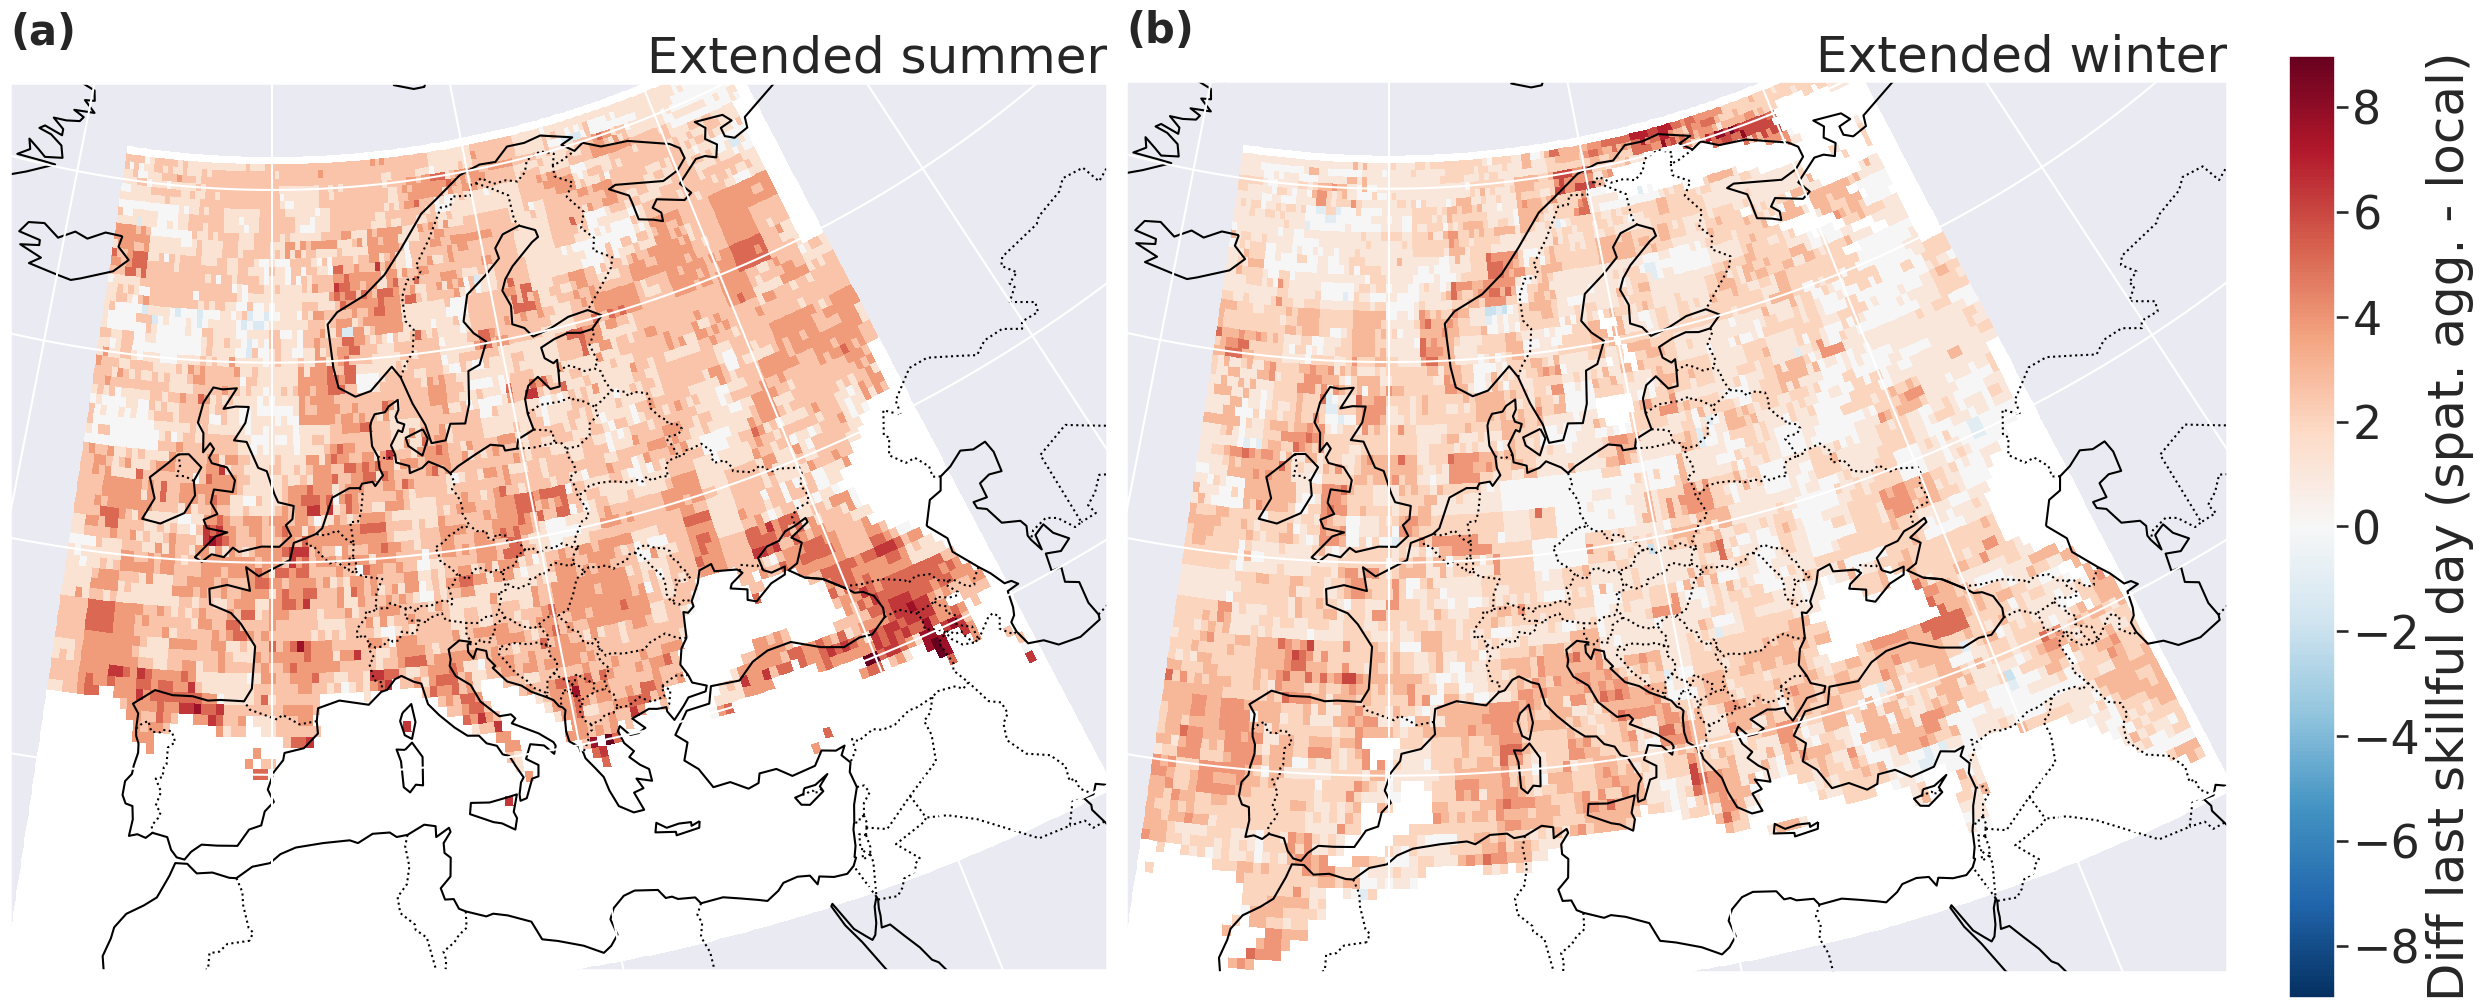

In [36]:
fig=plt.figure(figsize=(30,20))
gs = fig.add_gridspec(1, 21)


local_cmap = copy.copy(cm.RdBu_r)
local_cmap.set_bad('white', alpha = 1)

ax1 = fig.add_subplot(gs[:, :10], projection=ccrs.AlbersEqualArea())
ax1.text(0, 1.08, "(a)", transform=ax1.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


a = (BLF_1ev_summer-BLF_summer).plot.pcolormesh(ax=ax1,add_colorbar=False,
                               transform=ccrs.PlateCarree(),cmap=local_cmap)
ax1.add_feature(cfeature.COASTLINE, linestyle='-')
ax1.add_feature(cfeature.BORDERS, linestyle=':')

ax1.set_title('') ; ax1.set_title("Extended summer", loc='right');



ax2 = fig.add_subplot(gs[:, 10:], projection=ccrs.AlbersEqualArea())
ax2.text(0, 1.08, "(b)", transform=ax2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}

b = (BLF_1ev_winter-BLF_winter).plot.pcolormesh(ax=ax2,add_colorbar=False,
                               transform=ccrs.PlateCarree(),cmap=local_cmap)
c = (BLF_1ev_winter-BLF_winter).plot.pcolormesh(ax=ax2,add_colorbar=False,
                               transform=ccrs.PlateCarree(),cmap=local_cmap)
ax2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2.add_feature(cfeature.BORDERS, linestyle=':')

ax2.set_title(''); ax2.set_title("Extended winter", loc='right');

cbar = fig.colorbar(b, ax=ax2, fraction = 0.039, label=r'Diff last skillful day (spat. agg. - local)',)

## Brier Skill Score

### Seasonal local

In [3]:
perc=95
minimal_threshold=5
seas = "MJJASO"
Brier_last_summer = xr.open_mfdataset(last_skillful_day_folder+"BSS_lead_"+str(perc)+"th_perc_"+str(seas)+".nc")
seas = "NDJFMA"
Brier_last_winter = xr.open_mfdataset(last_skillful_day_folder+"BSS_lead_"+str(perc)+"th_perc_"+str(seas)+".nc")
percentile_data = xr.open_mfdataset(exceed_folder+"Observ_"+ str(perc)+"thperc_season_dependant.nc")

In [4]:
min_perc_winter=np.amin(percentile_data.perc95.isel(season=[0,3]), axis=0)
min_perc_summer=np.amin(percentile_data.perc95.isel(season=[1,2]), axis=0)

In [5]:
BSS_summer = Brier_last_summer.Last_week.where(min_perc_summer>minimal_threshold)
BSS_winter = Brier_last_winter.Last_week.where(min_perc_winter>minimal_threshold)

In [20]:
col_9 = sns.color_palette("cubehelix", n_colors=9)
levels = [0,2,4,6,8,10,12,14,16,18]
levels22 = [0,2,4,6,8,10,12,14]
cbar_ticks = [  levels22[i] + (levels22[i+1]-levels22[i]) / 2.0 for i in range(7)]
cbar_labels = [ "0-1","2-3","4-5","6-7","8-9","10-11","12-13"]

In [21]:
cbar_ticks

[1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0]

In [23]:
fig=plt.figure(figsize=(30,20))
gs = fig.add_gridspec(1, 21)

local_cmap = copy.copy(cm.cubehelix)
local_cmap.set_bad('white', alpha = 1)

ax1 = fig.add_subplot(gs[:, :10], projection=ccrs.AlbersEqualArea())
ax1.text(0, 1.08, "(a)", transform=ax1.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


a = BSS_summer.plot.pcolormesh(ax=ax1, levels=levels, colors=local_cmap,add_colorbar=False,
                               transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, linestyle='-')
ax1.add_feature(cfeature.BORDERS, linestyle=':')

ax1.set_title('') ; ax1.set_title("Extended summer", loc='right');



ax2 = fig.add_subplot(gs[:, 10:], projection=ccrs.AlbersEqualArea())
ax2.text(0, 1.08, "(b)", transform=ax2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


b = BSS_winter.plot.pcolormesh(ax=ax2, levels=levels22, colors = col_9,add_colorbar=False,
                               transform=ccrs.PlateCarree())
c = BSS_winter.plot.pcolormesh(ax=ax2, levels=levels, colors=local_cmap,add_colorbar=False,
                               transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2.add_feature(cfeature.BORDERS, linestyle=':')

ax2.set_title(''); ax2.set_title("Extended winter", loc='right');

cbar = fig.colorbar(b, ax=ax2, fraction = 0.039, label=r'Last skillful day', ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels);

plt.savefig(figure_folder+"Panel_BSS_daily_seas.png", bbox_inches="tight",pad_inches=0)

## BSS spatially aggregated

In [24]:
perc=95
minimal_threshold=5


percentile_data = xr.open_mfdataset(exceed_folder+"Observ_"+ str(perc)+"thperc_season_dependant.nc")
min_perc_winter=np.amin(percentile_data.perc95.isel(season=[0,3]), axis=0)
min_perc_summer=np.amin(percentile_data.perc95.isel(season=[1,2]), axis=0)


seas = "NDJFMA"

Brier_last = xr.open_mfdataset(last_skillful_day_folder+"SpatiAcc_BSS_lead_"+str(perc)+"th_perc_"+str(seas)+"_V2.nc")

BSS_1ev_winter = Brier_last.Lastday_1ev_spa.where(min_perc_winter>minimal_threshold)
BSS_2ev_winter = Brier_last.Lastday_2ev_spa.where(min_perc_winter>minimal_threshold)
BSS_3ev_winter = Brier_last.Lastday_3ev_spa.where(min_perc_winter>minimal_threshold)



seas = "MJJASO"

Brier_last = xr.open_mfdataset(last_skillful_day_folder+"SpatiAcc_BSS_lead_"+str(perc)+"th_perc_"+str(seas)+"_V2.nc")
BSS_1ev_summer = Brier_last.Lastday_1ev_spa.where(min_perc_summer>minimal_threshold)
BSS_2ev_summer = Brier_last.Lastday_2ev_spa.where(min_perc_summer>minimal_threshold)
BSS_3ev_summer = Brier_last.Lastday_3ev_spa.where(min_perc_summer>minimal_threshold)


In [26]:
col_8 = sns.color_palette("magma", n_colors=8)
#bounds = [i for i in np.linspace(0,14,2)]
levels22 = [0,2,4,6,8,10,12,14]
levels =  [0,2,4,6,8,10,12,14,16]

cbar_ticks = [  levels[i] + (levels[i+1]-levels[i]) / 2.0 for i in range(7)]
cbar_labels = [ "0-1","2-3","4-5","6-7","8-9","10-11","12-13"]

In [29]:
col_8 = sns.color_palette("cubehelix", n_colors=8)
#bounds = [i for i in np.linspace(0,14,2)]
levels22 = [0,2,4,6,8,10,12,14]
levels =  [0,2,4,6,8,10,12,14,16]

cbar_ticks = [  levels[i] + (levels[i+1]-levels[i]) / 2.0 for i in range(7)]
cbar_labels = [ "0-1","2-3","4-5","6-7","8-9","10-11","12-13"]

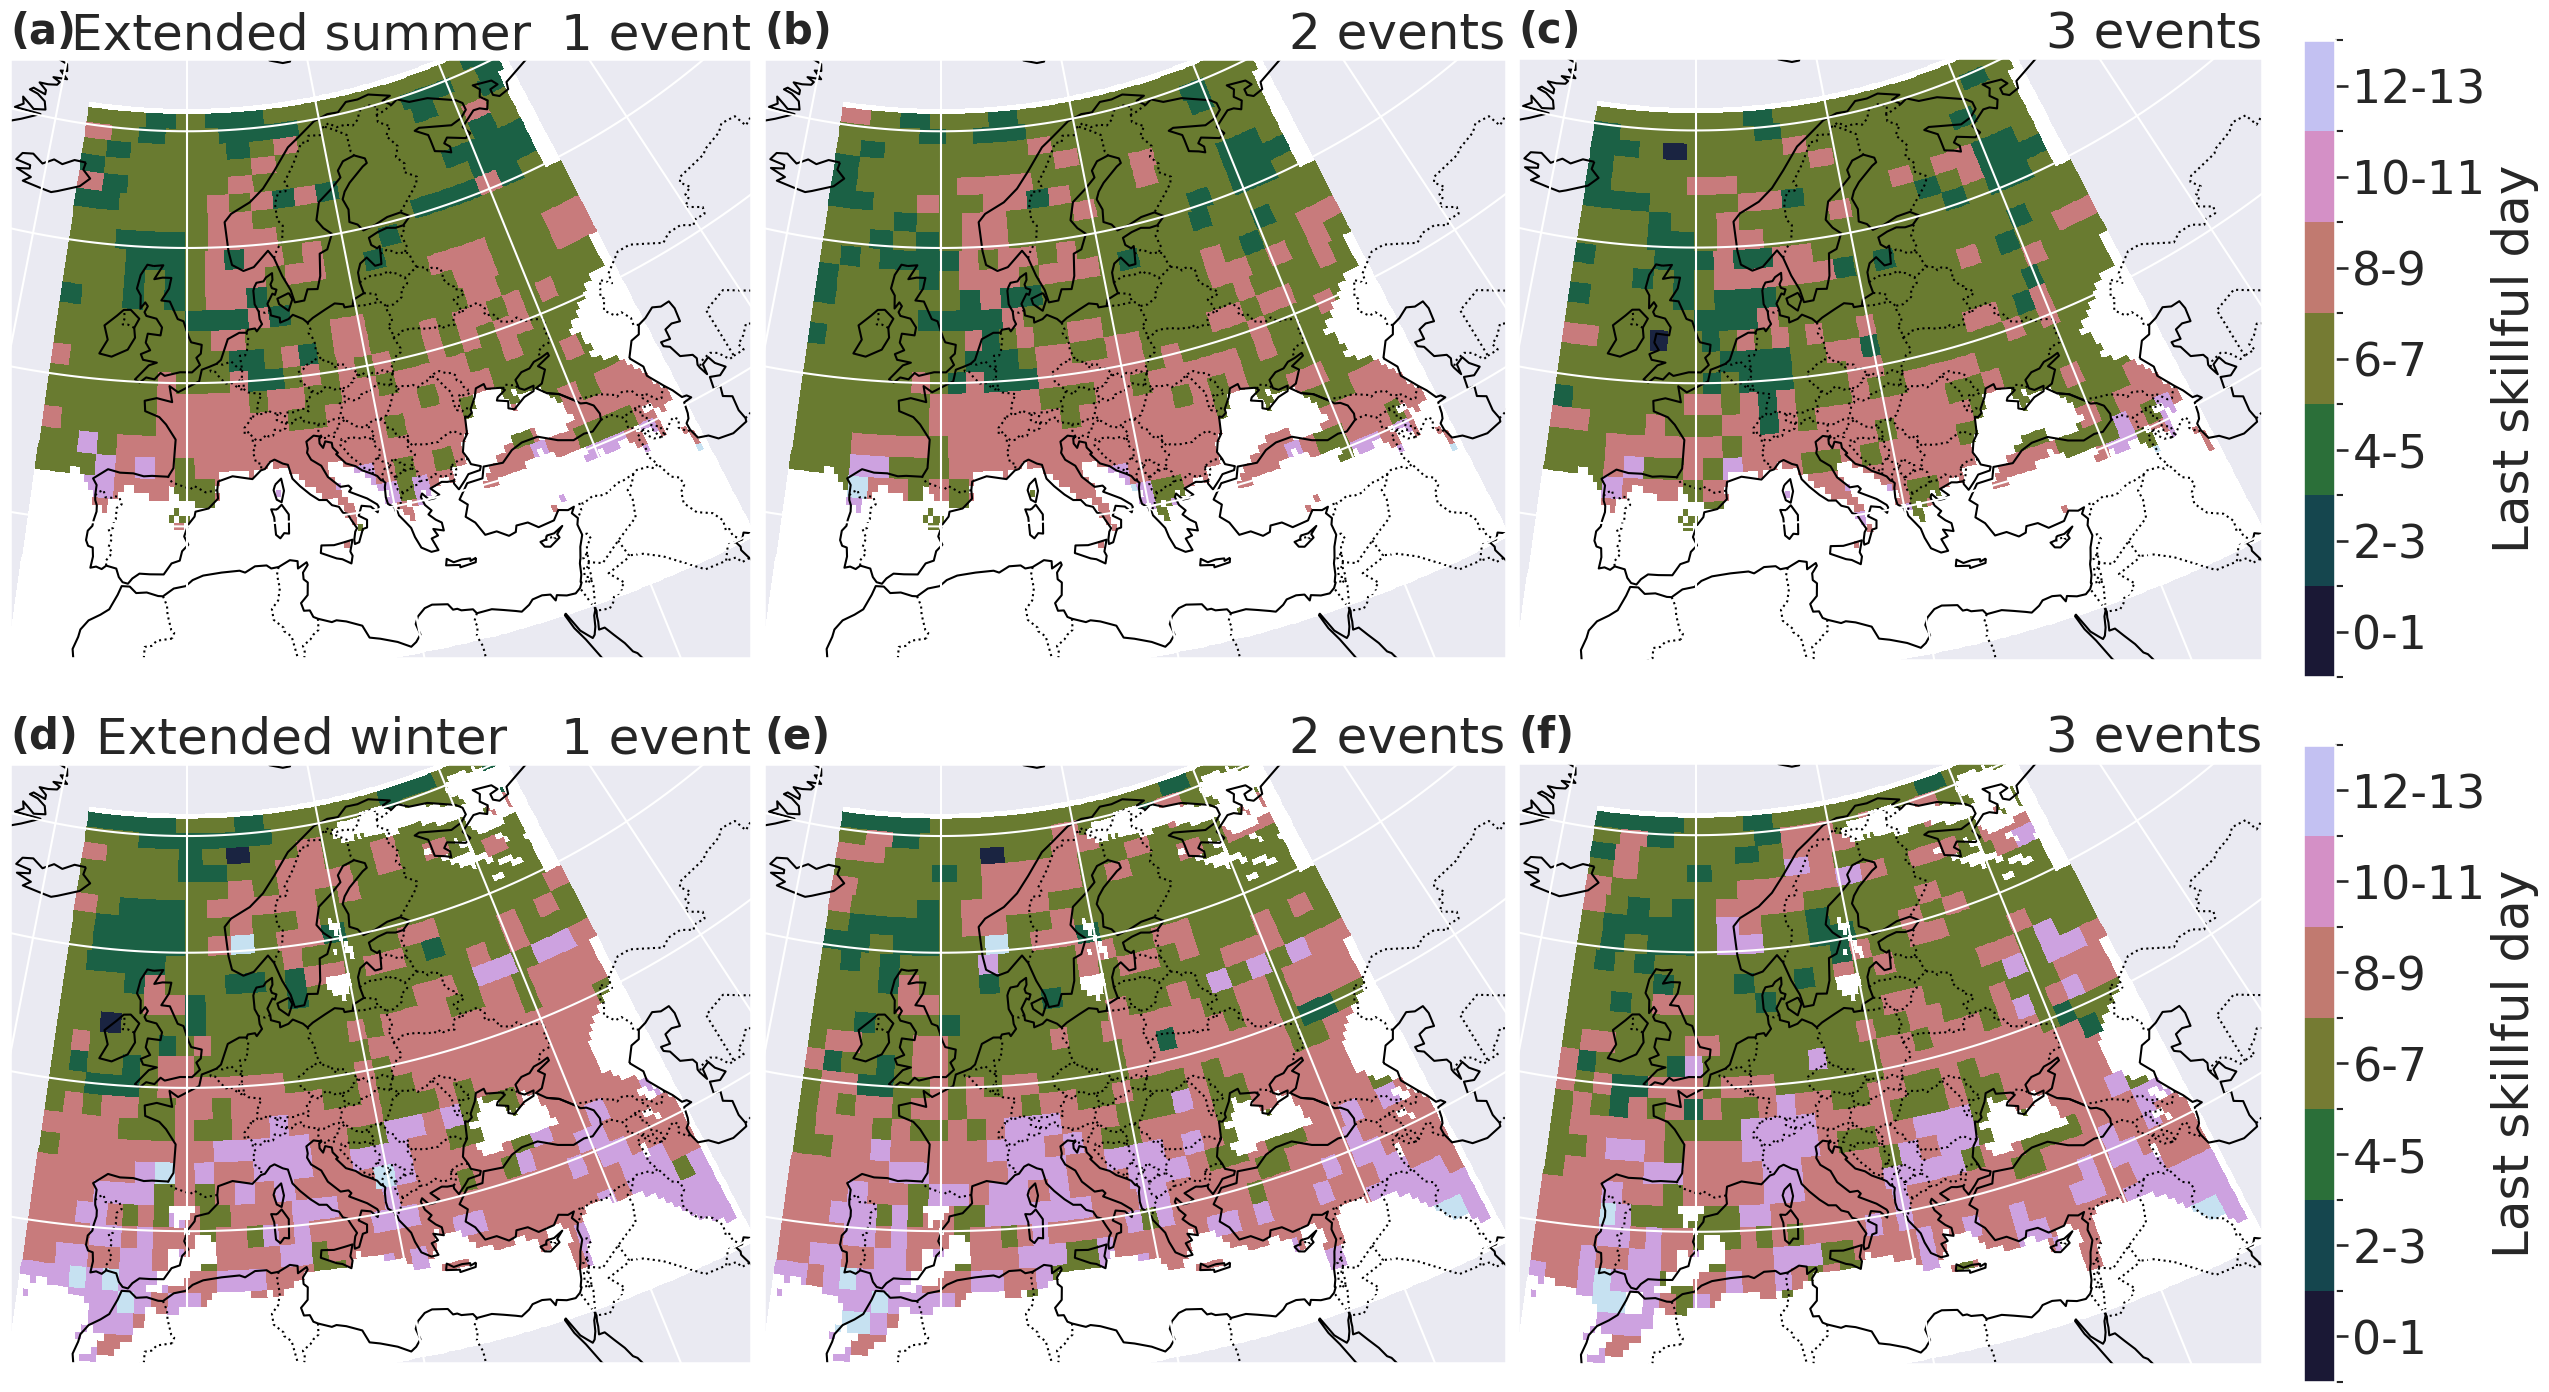

In [31]:
fig=plt.figure(figsize=(30,20))
gs = fig.add_gridspec(10, 31)

local_cmap = copy.copy(cm.cubehelix)
local_cmap.set_bad('white', alpha = 1)

ax1 = fig.add_subplot(gs[:6, :10], projection=ccrs.AlbersEqualArea())
ax1.text(0, 1.08, "(a)", transform=ax1.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}



a = BSS_1ev_summer.plot.pcolormesh(ax=ax1, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE, linestyle='-')
ax1.add_feature(cfeature.BORDERS, linestyle=':')

ax1.set_title('') ; ax1.set_title("1 event", loc='right');
ax1.set_title("Extended summer          ", loc='center')



ax2 = fig.add_subplot(gs[:6, 10:20], projection=ccrs.AlbersEqualArea())
ax2.text(0, 1.08, "(b)", transform=ax2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


b = BSS_2ev_summer.plot.pcolormesh(ax=ax2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2.add_feature(cfeature.BORDERS, linestyle=':')

ax2.set_title(''); ax2.set_title("2 events", loc='right');




ax3 = fig.add_subplot(gs[:6, 20:], projection=ccrs.AlbersEqualArea())
ax3.text(0, 1.08, "(c)", transform=ax3.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax3.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


c = BSS_3ev_summer.plot.pcolormesh(ax=ax3, levels=levels22, colors=col_8,
                            add_colorbar=False, transform=ccrs.PlateCarree())
c2 = BSS_3ev_summer.plot.pcolormesh(ax=ax3, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.COASTLINE, linestyle='-')
ax3.add_feature(cfeature.BORDERS, linestyle=':')

ax3.set_title(''); ax3.set_title("3 events", loc='right');
cbar = fig.colorbar(c, ax=ax3, fraction = 0.039, label=r'Last skillful day', ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels);





ax1_2 = fig.add_subplot(gs[5:, :10], projection=ccrs.AlbersEqualArea())
ax1_2.text(0, 1.08, "(d)", transform=ax1_2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax1_2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax1_2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}



a_2 = BSS_1ev_winter.plot.pcolormesh(ax=ax1_2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax1_2.add_feature(cfeature.COASTLINE, linestyle='-')
ax1_2.add_feature(cfeature.BORDERS, linestyle=':')

ax1_2.set_title('') ; ax1_2.set_title("1 event", loc='right');
ax1_2.set_title("Extended winter          ", loc='center')



ax2_2 = fig.add_subplot(gs[5:, 10:20], projection=ccrs.AlbersEqualArea())
ax2_2.text(0, 1.08, "(e)", transform=ax2_2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax2_2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax2_2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


b_2 = BSS_2ev_winter.plot.pcolormesh(ax=ax2_2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax2_2.add_feature(cfeature.COASTLINE, linestyle='-')
ax2_2.add_feature(cfeature.BORDERS, linestyle=':')

ax2_2.set_title(''); ax2_2.set_title("2 events", loc='right');




ax3_2 = fig.add_subplot(gs[5:, 20:], projection=ccrs.AlbersEqualArea())
ax3_2.text(0, 1.08, "(f)", transform=ax3_2.transAxes,
         fontsize=30, fontweight='bold', va='top')
ax3_2.set_extent(([-15, 49.5, 30, 69.5]))
gl = ax3_2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False)
gl.ylines = True ; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER ; gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'grey'} ; gl.ylabel_style = {'color': 'grey'}


c_2 = BSS_3ev_winter.plot.pcolormesh(ax=ax3_2, levels=levels22, colors=col_8,
                            add_colorbar=False, transform=ccrs.PlateCarree())
c_222 = BSS_3ev_winter.plot.pcolormesh(ax=ax3_2, levels=levels, cmap=local_cmap,
                            add_colorbar=False, transform=ccrs.PlateCarree())
ax3_2.add_feature(cfeature.COASTLINE, linestyle='-')
ax3_2.add_feature(cfeature.BORDERS, linestyle=':')

ax3_2.set_title(''); ax3_2.set_title("3 events", loc='right');
cbar = fig.colorbar(c_2, ax=ax3_2, fraction = 0.039, label=r'Last skillful day', ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_labels);


plt.savefig(figure_folder,"Panel_BSS_spa_acc_V3_3ev.png",bbox_inches="tight",pad_inches=0)